Para entrar no modo apresentação, execute a seguinte célula e pressione `-`

In [1]:
%reload_ext slide

<IPython.core.display.Javascript object>

<span class="notebook-slide-start"/>

# APIs do GitHub (v3)

Este notebook apresenta os seguintes tópicos:

- [APIs do GitHub](#APIs-do-GitHub)
- [Autenticação](#Autentica%C3%A7%C3%A3o)
- [API v3](#API-v3)
- [Exercício 6](#Exerc%C3%ADcio-6)
- [Exercício 7](#Exerc%C3%ADcio-7)
- [Exercício 8](#Exerc%C3%ADcio-8)

## APIs do GitHub

Como o GitHub oferece APIs para obter informações de repositórios, usá-las em geral é melhor do que fazer crawling.

O GitHub possui duas versões estáveis de APIs:

- REST API v3: https://developer.github.com/v3/
- GraphQL API v4: https://developer.github.com/v4/

A forma de usar cada API é diferente e a taxa de requisições permitidas também é. Neste minicurso, usaremos requests para acessar ambas as APIs, mas existem bibliotecas prontas (como a PyGitHub para a v3) que fazem o acesso.

### Autenticação

Para usar qualquer uma das APIs, é necessário gerar um token de autenticação no GitHub seguindo os seguintes passos.

Primeiro, vá em configurações da conta.

<img src="images/github1.png" alt="Página inicial do GitHub" width="auto"/>

Em seguida, abra configurações de desenvolvedor.

<img src="images/github2.png" alt="Página de Configurações do Usuário" width="auto"/>

Abra "Personal access tokens" e clique em "Generate new token". 

<img src="images/github3.png" alt="Página de Tokens de Acesso Pessoal" wi3dth="auto"/>

Escolha as permissões que você deseja no token. 

<img src="images/github4.png" alt="Página de Criação de Token de Acesso Pessoal" width="auto"/>

Copie o token gerado para algum lugar seguro. Para o minicurso, eu copiei o meu token para `~/githubtoken.txt` e vou carregá-lo para a variável `token` a seguir. <span class="notebook-slide-extra" data-count="1"/>

In [2]:
from ipywidgets import FileUpload, interact
@interact(files=FileUpload())
def set_token(files={}):
    global token
    if files:
        for key, values in files.items():
            token = values['content'].decode("utf-8").strip()
            print("Token Loaded!")

interactive(children=(FileUpload(value={}, description='Upload'), Output()), _dom_classes=('widget-interact',)…

## API v3

Com o token em mãos, podemos começar a usa a API v3. O acesso a API do GitHub é feito a https://api.github.com. Portanto, precisamos mudar o site de nosso servidor de proxy. Para isso, podemos fechar e reiniciar da seguinte forma:

```bash
python proxy.py https://api.github.com/
```

Inicialmente, vamos fazer uma requisição para verificar se a autenticação funciona e para vermos nosso limite de requisições. <span class="notebook-slide-extra" data-count="1"/>

In [3]:
import requests 
SITE = "http://localhost:5000/" # ou https://api.github.com
def token_auth(request):
    request.headers["User-Agent"] = "Minicurso" # Necessário
    request.headers["Authorization"] = "token {}".format(token)
    return request
response = requests.get(SITE, auth=token_auth)
response.status_code

200

Resultado 200 - a autenticação funcionou. <span class="notebook-slide-scroll" data-position="-1"/>

O limite de acesso vem definido no header. <span class="notebook-slide-extra" data-count="3"/>

In [4]:
response.headers["X-RateLimit-Limit"]

'5000'

In [5]:
response.headers["X-RateLimit-Remaining"]

'4999'

In [6]:
response.headers["X-RateLimit-Reset"]

'1571985661'

O retorno da API v3 é sempre um JSON. O acesso a https://api.github.com retorna as URLS válidas da API. <span class="notebook-slide-extra" data-count="1"/>

In [7]:
response.json()

{'current_user_url': 'https://api.github.com/user',
 'current_user_authorizations_html_url': 'https://github.com/settings/connections/applications{/client_id}',
 'authorizations_url': 'https://api.github.com/authorizations',
 'code_search_url': 'https://api.github.com/search/code?q={query}{&page,per_page,sort,order}',
 'commit_search_url': 'https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}',
 'emails_url': 'https://api.github.com/user/emails',
 'emojis_url': 'https://api.github.com/emojis',
 'events_url': 'https://api.github.com/events',
 'feeds_url': 'https://api.github.com/feeds',
 'followers_url': 'https://api.github.com/user/followers',
 'following_url': 'https://api.github.com/user/following{/target}',
 'gists_url': 'https://api.github.com/gists{/gist_id}',
 'hub_url': 'https://api.github.com/hub',
 'issue_search_url': 'https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}',
 'issues_url': 'https://api.github.com/issues',
 'keys_url': '

Vamos ver o que a API tem sobre algum repositório.

Primeiro precisamos ver qual URL usar. <span class="notebook-slide-extra" data-count="1"/>

In [8]:
_['repository_url']

'https://api.github.com/repos/{owner}/{repo}'

Em seguida, fazemos a requisição para saber o que tem no repositorio `gems-uff/sapos`. <span class="notebook-slide-extra" data-count="2"/>

In [9]:
response = requests.get(SITE + "repos/gems-uff/sapos", auth=token_auth)
response.status_code

200

In [10]:
data = response.json()
data

{'id': 3722240,
 'node_id': 'MDEwOlJlcG9zaXRvcnkzNzIyMjQw',
 'name': 'sapos',
 'full_name': 'gems-uff/sapos',
 'private': False,
 'owner': {'login': 'gems-uff',
  'id': 1486707,
  'node_id': 'MDEyOk9yZ2FuaXphdGlvbjE0ODY3MDc=',
  'avatar_url': 'https://avatars0.githubusercontent.com/u/1486707?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/gems-uff',
  'html_url': 'https://github.com/gems-uff',
  'followers_url': 'https://api.github.com/users/gems-uff/followers',
  'following_url': 'https://api.github.com/users/gems-uff/following{/other_user}',
  'gists_url': 'https://api.github.com/users/gems-uff/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/gems-uff/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/gems-uff/subscriptions',
  'organizations_url': 'https://api.github.com/users/gems-uff/orgs',
  'repos_url': 'https://api.github.com/users/gems-uff/repos',
  'events_url': 'https://api.github.com/users/gems-uff/events{/privacy

O resultado tem diversos resultados e URLs para pegar mais informações. Vamos pegar algumas informações diretas interessantes. <span class="notebook-slide-extra" data-count="1"/>

In [11]:
print("Estrelas:", data["stargazers_count"])
print("Forks:", data["forks"])
print("Watchers:", data["subscribers_count"])
print("Issues abertas:", data["open_issues"])
print("Linguagem:", data["language"])

Estrelas: 18
Forks: 11
Watchers: 6
Issues abertas: 41
Linguagem: Ruby


Se quisermos saber quem são os colaboradores do projeto e quais são as issues existentes, podemos obter as respectivas URLs. <span class="notebook-slide-extra" data-count="1"/>

In [12]:
print("Colaboradores:", data["contributors_url"])
print("Issues:", data["issues_url"])

Colaboradores: https://api.github.com/repos/gems-uff/sapos/contributors
Issues: https://api.github.com/repos/gems-uff/sapos/issues{/number}


Agora podemos obter a lista de colaboradores. <span class="notebook-slide-extra" data-count="2"/>

In [13]:
response = requests.get(SITE + "repos/gems-uff/sapos/contributors", auth=token_auth)
response.status_code

200

In [14]:
data = response.json()
data

[{'login': 'JoaoFelipe',
  'id': 327789,
  'node_id': 'MDQ6VXNlcjMyNzc4OQ==',
  'avatar_url': 'https://avatars1.githubusercontent.com/u/327789?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/JoaoFelipe',
  'html_url': 'https://github.com/JoaoFelipe',
  'followers_url': 'https://api.github.com/users/JoaoFelipe/followers',
  'following_url': 'https://api.github.com/users/JoaoFelipe/following{/other_user}',
  'gists_url': 'https://api.github.com/users/JoaoFelipe/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/JoaoFelipe/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/JoaoFelipe/subscriptions',
  'organizations_url': 'https://api.github.com/users/JoaoFelipe/orgs',
  'repos_url': 'https://api.github.com/users/JoaoFelipe/repos',
  'events_url': 'https://api.github.com/users/JoaoFelipe/events{/privacy}',
  'received_events_url': 'https://api.github.com/users/JoaoFelipe/received_events',
  'type': 'User',
  'site_admin': False,
 

### Gráfico de Barras

A partir desta lista, podemos fazer um gráfico de barras de contribuições. <span class="notebook-slide-extra" data-count="2"/>

In [15]:
contributions = {x["login"]: x["contributions"] for x in data}
contributions

{'JoaoFelipe': 347,
 'emoreth': 228,
 'bschettino': 216,
 'leomurta': 142,
 'tiagoamaro': 120,
 'Carlos-Eduardo-Cabral-da-Cunha': 113,
 'lvieirajr': 89,
 'braganholo': 69,
 'danielpcampagna': 32,
 'rdiasferreira': 24,
 'bernardocs': 7}

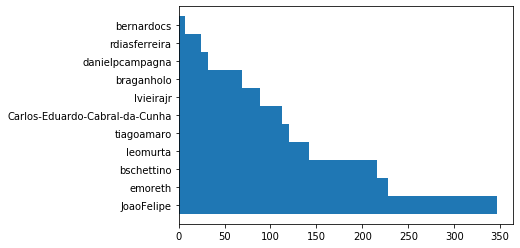

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
labels, values = zip(*contributions.items())
indexes = np.arange(len(labels))
width = 1
plt.barh(indexes, values, width)
plt.yticks(indexes, labels)
plt.show()

Nesse código:

- Importamos `matplotlib` e `numpy` para gerar o gráfico
- Chamamos `%matplotlib inline` para permitir a visualização da figura
- Separamos o dicionário `contributions` em duas listas de `labels` e `values`
- Criamos um `arange` de índices
- Criamos o gráfico de barras horizontal, usando `barh`
- Definimos os ticks de y como sendo os `labels` extraídos anteriormente

Podemos acessar também a url de issues. <span class="notebook-slide-extra" data-count="3"/>

In [17]:
response = requests.get(SITE + "repos/gems-uff/sapos/issues", auth=token_auth)
response.status_code

200

In [18]:
data = response.json()
data

[{'url': 'https://api.github.com/repos/gems-uff/sapos/issues/303',
  'repository_url': 'https://api.github.com/repos/gems-uff/sapos',
  'labels_url': 'https://api.github.com/repos/gems-uff/sapos/issues/303/labels{/name}',
  'comments_url': 'https://api.github.com/repos/gems-uff/sapos/issues/303/comments',
  'events_url': 'https://api.github.com/repos/gems-uff/sapos/issues/303/events',
  'html_url': 'https://github.com/gems-uff/sapos/issues/303',
  'id': 496454487,
  'node_id': 'MDU6SXNzdWU0OTY0NTQ0ODc=',
  'number': 303,
  'title': 'Relatório de prorrogações concedidas',
  'user': {'login': 'braganholo',
   'id': 1494494,
   'node_id': 'MDQ6VXNlcjE0OTQ0OTQ=',
   'avatar_url': 'https://avatars3.githubusercontent.com/u/1494494?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/braganholo',
   'html_url': 'https://github.com/braganholo',
   'followers_url': 'https://api.github.com/users/braganholo/followers',
   'following_url': 'https://api.github.com/users/braganholo/fo

In [19]:
len(data)

30

Por padrão, a API retorna 30 itens por página. Dessa forma. a lista retornou apenas a primeira página de issues. <span class="notebook-slide-position" data-count="-1"/>

Podemos acessar a segunda página com o parâmetro `?page=2`. <span class="notebook-slide-extra" data-count="3"/>

In [20]:
response = requests.get(SITE + "repos/gems-uff/sapos/issues?page=2", auth=token_auth)
response.status_code

200

In [21]:
data2 = response.json()
data2

[{'url': 'https://api.github.com/repos/gems-uff/sapos/issues/174',
  'repository_url': 'https://api.github.com/repos/gems-uff/sapos',
  'labels_url': 'https://api.github.com/repos/gems-uff/sapos/issues/174/labels{/name}',
  'comments_url': 'https://api.github.com/repos/gems-uff/sapos/issues/174/comments',
  'events_url': 'https://api.github.com/repos/gems-uff/sapos/issues/174/events',
  'html_url': 'https://github.com/gems-uff/sapos/issues/174',
  'id': 57198796,
  'node_id': 'MDU6SXNzdWU1NzE5ODc5Ng==',
  'number': 174,
  'title': 'Lista de Requisitos para Matrícula',
  'user': {'login': 'braganholo',
   'id': 1494494,
   'node_id': 'MDQ6VXNlcjE0OTQ0OTQ=',
   'avatar_url': 'https://avatars3.githubusercontent.com/u/1494494?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/braganholo',
   'html_url': 'https://github.com/braganholo',
   'followers_url': 'https://api.github.com/users/braganholo/followers',
   'following_url': 'https://api.github.com/users/braganholo/follo

In [22]:
len(data2)

11

Podemos formar uma lista com todas as issues abertas. <span class="notebook-slide-extra" data-count="1"/>

In [23]:
open_issues = data + data2

Essas são apenas as issues abertas. Para pegarmos as issues fechadas, precisamos definir `state=closed`. Podemos aproveitar e definir também `per_page=100` (limite máximo) e fazer um código para pegar todas as páginas. <span class="notebook-slide-extra" data-count="1"/>

In [24]:
should_continue = True
page = 1
closed_issues = []
while should_continue:
    response = requests.get(SITE + "repos/gems-uff/sapos/issues?page={}&per_page=100&state=closed".format(page), auth=token_auth)
    if response.status_code != 200:
        print("Fail:", response.status_code)
        break
    data = response.json()
    closed_issues += data
    if len(data) < 100:
        should_continue = False
    page += 1
len(closed_issues), page - 1

(262, 3)

Foram encontradas 262 issues em 3 páginas. <span class="notebook-slide-scroll" data-position="-1"/>

Agora podemos fazer um gráfico que mostre a evolução de issues abertas ao longo do tempo. 

Para fazer esse gráfico, primeiro precisamos combinar as issues e descobrir qual foi a data da issue mais antiga. <span class="notebook-slide-extra" data-count="1"/>

In [25]:
import dateutil.parser

all_issues = open_issues + closed_issues
oldest_issue = min(
    all_issues, 
    key=lambda x: dateutil.parser.parse(x["created_at"])
)

oldest_date = dateutil.parser.parse(oldest_issue["created_at"])
oldest_date

datetime.datetime(2013, 6, 29, 15, 23, 48, tzinfo=tzutc())

A partir desta data, podemos criar um range de dias até hoje para ser o nosso índice do gráfico e um array de zeros do `numpy` para acumularmos a quantidade de issues abertas. <span class="notebook-slide-extra" data-count="1"/>

In [26]:
from datetime import datetime, timezone
today = datetime.now(timezone.utc)
delta = today - oldest_date
days = delta.days
print(days)
indexes = np.arange(days)
values = np.zeros(days)

2309


Podemos percorrer todas as issues abertas, incrementando `values` do período em que elas foram abertas até hoje. E podemos percorrer todas as issues fechadas incrementando `values` do período em que elas foram abertas até o período em que elas foram fechadas. <span class="notebook-slide-extra" data-count="1"/>

In [27]:
for issue in open_issues:
    created_at = dateutil.parser.parse(issue["created_at"])
    created_at_index = (created_at - oldest_date).days
    values[created_at_index:] += 1
    
for issue in closed_issues:
    created_at = dateutil.parser.parse(issue["created_at"])
    created_at_index = (created_at - oldest_date).days
    
    closed_at = dateutil.parser.parse(issue["closed_at"])
    closed_at_index = (closed_at - oldest_date).days
    values[created_at_index:closed_at_index] += 1

Já é possível plotar o gráfico desta forma, mas o entendimento dos eixos ainda não é o ideal. <span class="notebook-slide-extra" data-count="1"/>

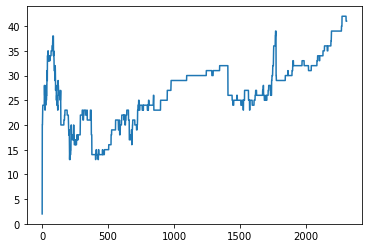

In [28]:
plt.plot(indexes, values)

Precisamos definir quais são os anos no eixo x. <span class="notebook-slide-extra" data-count="1"/>

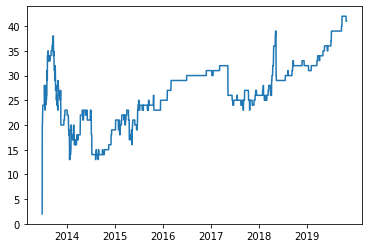

In [29]:
from math import ceil
labels = [datetime(2013 + i, 1, 1, tzinfo=timezone.utc) for i in range(ceil(delta.days / 365))]
label_indexes = [(label - oldest_date).days for label in labels]
label_years = [label.year for label in labels]
plt.xticks(label_indexes, label_years)
plt.plot(indexes, values)
plt.show()

Também podemos definir o que é cada eixo. <span class="notebook-slide-extra" data-count="1"/>

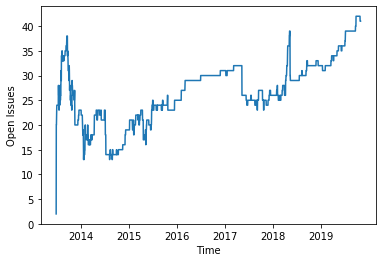

In [30]:
plt.xticks(label_indexes, label_years)
plt.xlabel("Time")
plt.ylabel("Open Issues")
plt.plot(indexes, values)
plt.show()

Issues podem ter diversos labels. Agora vamos fazer um gráfico que mostre barras estacadas com a evolução de cada tipo de issue. <span class="notebook-slide-extra" data-count="1"/>

In [31]:
from collections import defaultdict
values = defaultdict(lambda: np.zeros(days))

for issue in open_issues:
    created_at = dateutil.parser.parse(issue["created_at"])
    created_at_index = (created_at - oldest_date).days
    for label in issue["labels"]:
        values[label["name"]][created_at_index:] += 1
    if not issue["labels"]:
        values["no-label"][created_at_index:] += 1
        
for issue in closed_issues:
    created_at = dateutil.parser.parse(issue["created_at"])
    created_at_index = (created_at - oldest_date).days
    
    closed_at = dateutil.parser.parse(issue["closed_at"])
    closed_at_index = (closed_at - oldest_date).days
    for label in issue["labels"]:
        values[label["name"]][created_at_index:closed_at_index] += 1
    if not issue["labels"]:
        values["no-label"][created_at_index:closed_at_index] += 1
        


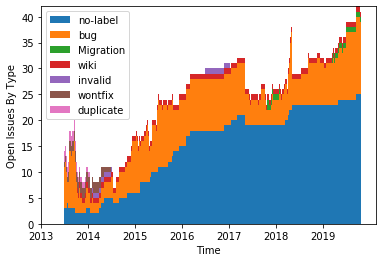

In [32]:
bottom = np.zeros(days)
legend_color = []
legend_text = []
for label, yvalues in values.items():
    if not label[0].isdigit(): # Exclui tags de versões
        ax = plt.bar(indexes, yvalues, 1,
                     bottom=bottom)
        legend_color.append(ax[0])
        bottom += yvalues
        legend_text.append(label)
        
plt.xticks(label_indexes, label_years)
plt.xlabel("Time")
plt.ylabel("Open Issues By Type")
plt.legend(legend_color, legend_text)
plt.show()

## Exercício 6

Crie um gráfico de linhas que mostre apenas issues do tipo bug. <span class="notebook-slide-extra" data-count="1"/>

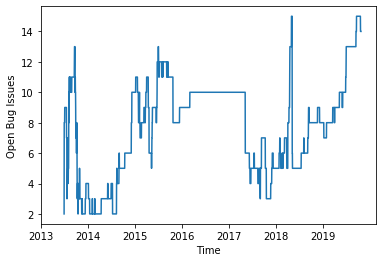

In [33]:
plt.plot(indexes, values["bug"])
plt.xticks(label_indexes, label_years)
plt.xlabel("Time")
plt.ylabel("Open Bug Issues")
plt.show()

## Exercício 7

Crie um gráfico de barras para mostrar a participação de usuários em cada issue. Considere o atributo `user`. <span class="notebook-slide-extra" data-count="2"/>

In [34]:
values = defaultdict(lambda: np.zeros(days))

for issue in open_issues:
    created_at = dateutil.parser.parse(issue["created_at"])
    created_at_index = (created_at - oldest_date).days
    values[issue["user"]["login"]][created_at_index:] += 1
        
for issue in closed_issues:
    created_at = dateutil.parser.parse(issue["created_at"])
    created_at_index = (created_at - oldest_date).days
    
    closed_at = dateutil.parser.parse(issue["closed_at"])
    closed_at_index = (closed_at - oldest_date).days
    values[issue["user"]["login"]][created_at_index:closed_at_index] += 1
      

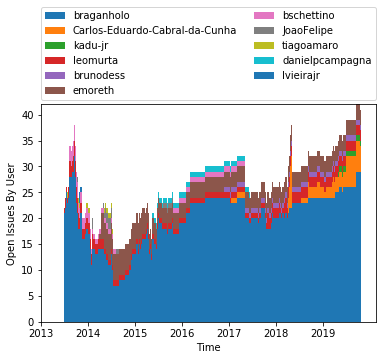

In [35]:
bottom = np.zeros(days)
legend_color = []
legend_text = []
for label, yvalues in values.items():
    if not label[0].isdigit(): # Exclui tags de versões
        ax = plt.bar(indexes, yvalues, 1,
                     bottom=bottom)
        legend_color.append(ax[0])
        bottom += yvalues
        legend_text.append(label)
        
plt.xticks(label_indexes, label_years)
plt.xlabel("Time")
plt.ylabel("Open Issues By User")
plt.legend(
    legend_color, legend_text,
    bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
    mode="expand", borderaxespad=0, ncol=2
)
plt.show()

## Exercício 8

Filtre o gráfico do total de issues abertas para mostrar apenas o ano 2014. <span class="notebook-slide-extra" data-count="2"/>

In [36]:
yfirst = datetime(2014, 1, 1, tzinfo=timezone.utc)
ylast = datetime(2015, 1, 1, tzinfo=timezone.utc)

yfirst_index = (yfirst - oldest_date).days
ylast_index = (ylast - oldest_date).days

deltadays = (ylast - yfirst).days
values = np.zeros(deltadays)
indexes = np.arange(deltadays)

for issue in open_issues:
    created_at = dateutil.parser.parse(issue["created_at"])
    created_at_index = (created_at - yfirst).days
    if created_at < ylast:
        if created_at < yfirst:
            created_at_index = 0
        values[created_at_index:] += 1
    
for issue in closed_issues:
    created_at = dateutil.parser.parse(issue["created_at"])
    created_at_index = (created_at - yfirst).days
    
    
    if created_at < ylast:
        if created_at < yfirst:
            created_at_index = 0
        closed_at = dateutil.parser.parse(issue["closed_at"])
        closed_at_index = (closed_at - yfirst).days
        if closed_at >= ylast:
            closed_at_index = None
        if closed_at >= yfirst:
            values[created_at_index:closed_at_index] += 1

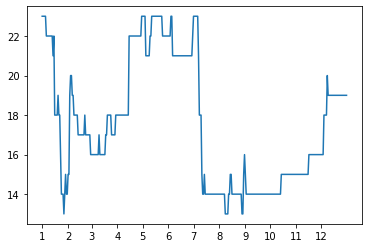

In [37]:
labels = [datetime(2014, i + 1, 1, tzinfo=timezone.utc) for i in range(12)]
label_indexes = [(label - yfirst).days for label in labels]
label_years = [label.month for label in labels]
plt.xticks(label_indexes, label_years)
plt.plot(indexes, values)
plt.show()

Continua: [7.API.v4.ipynb](7.API.v4.ipynb)

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


&nbsp;

&nbsp;

&nbsp;

